**Lavanya Bandla - 017553718**

# **Statistical Analysis of Tiktok Videos Going Viral**


TikTok has become one of the most popular and in-demand social media applications, used by millions of people. It is widely leveraged for advertising brands and products, including technology advertisements, as it reaches a large and diverse audience. I am interested in understanding why TikTok is so influential and what type of videos have the highest impact on the audience and their marketing interests. Where as I am curious to know about


I would like to explore below questions based on the given data:

1.   Generation of content which leads to higest likes and shares?
2.   Finding the correlation between the reach and the influencers follower count?
       * Although follower counts is not directly within the dataset, we can work with Views as a substitute measure for reach and find correlations to Likes, Shares, and Comments this will help us for achieving the infulencer followers.
3. Do specific content types (e.g., tutorials, product reviews, etc.) perform better with certain age groups, genders, or user interests (e.g., scholarship interest)?

From the prespective of stakeholder the above analysis might help in organizatinal growth and also helps in marketing the the tiktok with the help of influencers and advertising the product on best time to post.


<b>Additonal variables:</b>


*   User demographic
*   Hashtag
*   Posting time
*   Influencer count
*   Type of video whether it is for promotional or experimental

<h3> <b>Type of Study </b></h3>

The type of study is observational as it represents the existing tiktok video analysis without changing the existing data. The aim is to identify the correlation between the features for the increment of the likes or views based on reels we have posted.

**Data Source :**

The data is collected from the kaggle. The dataset consists of hashtag, shares, likes comments etc [1].

**Data collection:**

The data is collected from the third party API's of social media analytics that are publicly avaliable on websites. Additionally, from the public API's of the tiktok engagement metrics. The time period hasn't mentioned in the kaggle as it is public but the data in it will be the past two years or one.It is the observational study as i am checking on the trends and not manipulating any data for analysis.

**Units of observation:**
The unit of observation in this data is a single TikTok video post. Each row is the metadata for a TikTok video, likes, content type, user demographic, views etc. Essentially, each row is comparable to the performance and characteristics of a single video or post, so the unit of observation is the individual TikTok post.

**Variables Used:**

The variables that I am planning to study for the analysis is
Likes, Comments, Shares, Views, Content, Type, ContentType, UserDemographic, AgeGroup, Gender, InterestInScholarships.
Based on these variables for analysis of the tiktok vidoes and posts. I will be working on these variables for

*   content and the relation type(likes, views, shares)
*   showing how gender demographic is used for performance on post.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
tiktok_data = pd.read_csv('/content/drive/My Drive/ISE201_Project/tiktok_digital_marketing_data.csv', index_col=0)

Printing the first five rows of the dataset

In [ ]:
tiktok_data.head()

,Hashtag,Content,Type,ContentType,UserDemographic,Likes,Shares,Comments,Views,Location,AgeGroup,Gender,PreferredMajor,InterestInScholarships,TimeSpentOnContent
0,#StudyTips,LiveStream,Promotional,Cooking,Alumni,103,62,194,5464,Bekasi,35-44,Male,Business,3,31
1,#CampusTour,Image,Engagement,IT,Parent,436,370,4,7748,Depok,35-44,Female,Law,4,49
2,#StudentExperience,Image,Engagement,Education,Alumni,442,58,153,9333,Depok,19-24,Female,Law,2,16
3,#StudentExperience,Video,Engagement,IT,HighSchoolStudent,271,189,176,582,Bekasi,35-44,Female,Business,3,43
4,#CollegeAdmission,Text,Informational,Education,Alumni,107,337,26,5648,Bekasi,13-18,Male,Arts,4,22


Printing the columns that are present in tiktok dataset

In [ ]:
tiktok_data.columns

Index(['Hashtag', 'Content', 'Type', 'ContentType', 'UserDemographic', 'Likes',
       'Shares', 'Comments', 'Views', 'Location', 'AgeGroup', 'Gender',
       'PreferredMajor', 'InterestInScholarships', 'TimeSpentOnContent'],
      dtype='object')

In [ ]:
tiktok_data.dtypes

,0
Hashtag,object
Content,object
Type,object
ContentType,object
UserDemographic,object
Likes,int64
Shares,int64
Comments,int64
Views,int64
Location,object


In [ ]:
#checking for the null values
missing_values = tiktok_data.isnull().sum()
print(missing_values)

Hashtag                   0
Content                   0
Type                      0
ContentType               0
UserDemographic           0
Likes                     0
Shares                    0
Comments                  0
Views                     0
Location                  0
AgeGroup                  0
Gender                    0
PreferredMajor            0
InterestInScholarships    0
TimeSpentOnContent        0
dtype: int64


checking for the null values based on the output there are no null values in the data.

In [ ]:
#checking for the duplicate values in the tiktok marketing dataset
dup_rec_tiktok_data = tiktok_data.drop_duplicates(inplace=True)
print(dup_rec_tiktok_data)

None


There are no duplicate values in the dataset

In [ ]:
# Convert 'TimeSpentOnContent' column to datetime format (if applicable)
if "TimeSpentOnContent" in tiktok_data.columns:
    tiktok_data["TimeSpentOnContent"] = pd.to_datetime(tiktok_data["TimeSpentOnContent"], errors="coerce")

In [ ]:
tiktok_data['TimeSpentOnContent'].dtype

dtype('<M8[ns]')

converted the integer datatype of time_spent_on_content to minutes (datetime) data type

In [ ]:
#standardizing the data of string into either all lower cases
tiktok_data["Hashtag"] = tiktok_data["Hashtag"].str.strip().str.lower()  # converts into lower case
tiktok_data["Content"] = tiktok_data["Content"].str.strip().str.lower()
tiktok_data["Type"] = tiktok_data["Type"].str.strip().str.lower()
tiktok_data["ContentType"] = tiktok_data["ContentType"].str.strip().str.lower()
tiktok_data["UserDemographic"] = tiktok_data["UserDemographic"].str.strip().str.lower()
tiktok_data["Location"] = tiktok_data["Location"].str.strip().str.lower()
tiktok_data["Gender"] = tiktok_data["Gender"].str.strip().str.lower()
tiktok_data["PreferredMajor"] = tiktok_data["PreferredMajor"].str.strip().str.lower()

In [ ]:
print(tiktok_data.head(10))

              Hashtag     Content           Type ContentType  \
0          #studytips  livestream    promotional     cooking   
1         #campustour       image     engagement          it   
2  #studentexperience       image     engagement   education   
3  #studentexperience       video     engagement          it   
4   #collegeadmission        text  informational   education   
5   #collegeadmission       video  informational      gadget   
6  #studentexperience        text     engagement      gadget   
7          #studytips  livestream    promotional      sports   
8  #studentexperience        text    promotional     cooking   
9          #studytips       video     engagement          it   

     UserDemographic  Likes  Shares  Comments  Views   Location AgeGroup  \
0             alumni    103      62       194   5464     bekasi    35-44   
1             parent    436     370         4   7748      depok    35-44   
2             alumni    442      58       153   9333      depok    

standardised the all categorical data into lower case and presented the 10 rows of the data.

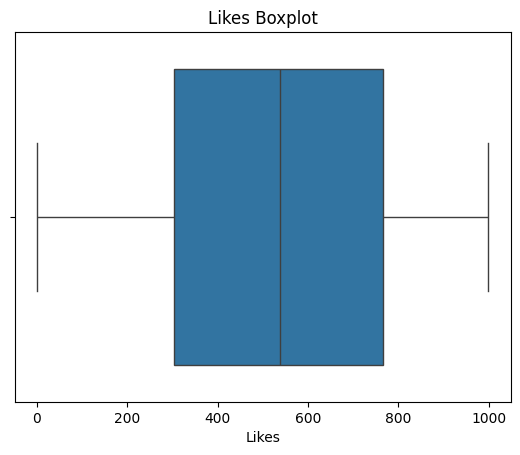

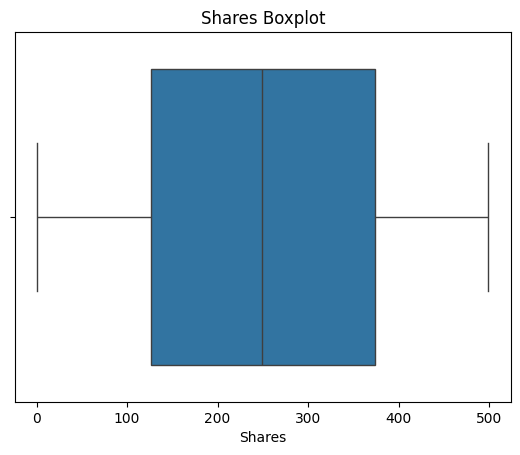

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plot

# Visualizing outliers for each numerical column with a boxplot
sns.boxplot(x=tiktok_data["Likes"])
plot.title("Likes Boxplot")
plot.show()

sns.boxplot(x=tiktok_data["Shares"])
plot.title("Shares Boxplot")
plot.show()


*   The box plot for likes shows the median around 800 likes and there is one outlier in the dataset
*   For the shares box plot - the median is about 250 shares for a post on tiktok which gives the

The boxplots suggest a consistent distribution of "Likes","Shares" data across all visualizations, with no significant outliers or skewness. The data is evenly distributed.



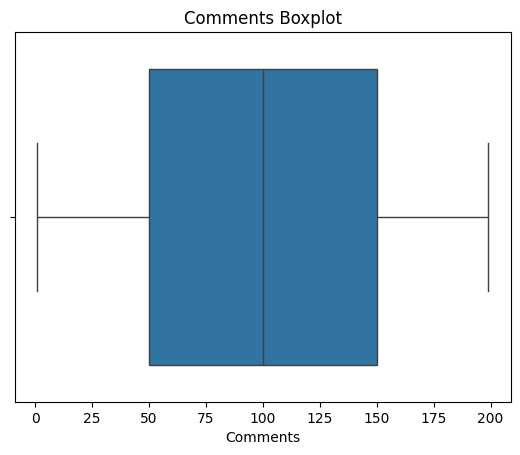

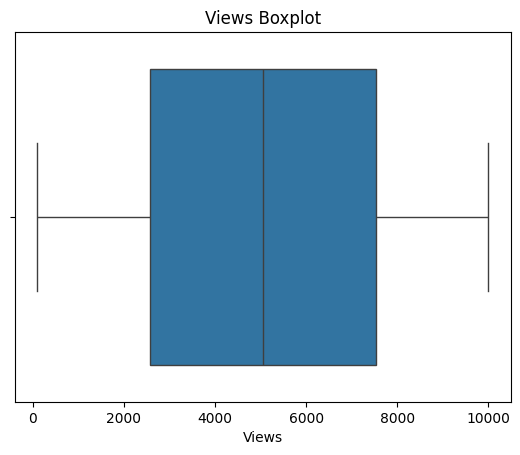

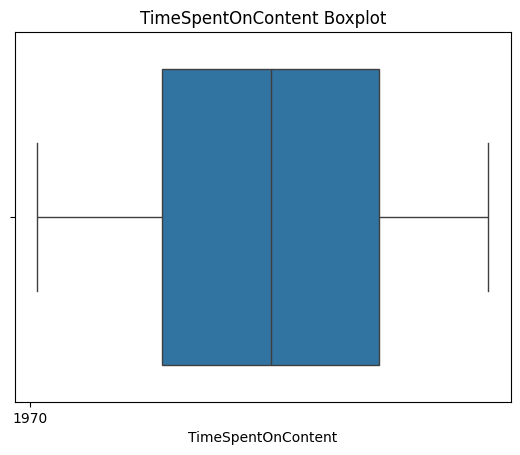

In [ ]:
sns.boxplot(x=tiktok_data["Comments"])
plot.title("Comments Boxplot")
plot.show()

sns.boxplot(x=tiktok_data["Views"])
plot.title("Views Boxplot")
plot.show()

sns.boxplot(x=tiktok_data["TimeSpentOnContent"])
plot.title("TimeSpentOnContent Boxplot")
plot.show()

there are no outliers currently in the dataset considered

#Exploratory Data analysis

In [ ]:
# Summary statistics for numerical variables
tiktok_data[['Likes', 'Shares', 'Comments', 'Views', 'InterestInScholarships', 'TimeSpentOnContent']].describe()

,Likes,Shares,Comments,Views,InterestInScholarships,TimeSpentOnContent
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,527.110685,249.816190,100.075180,5058.081460,3.000380,30.898880
std,278.247269,143.789643,57.521954,2858.987542,1.416136,16.413683
min,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000
25%,303.000000,126.000000,50.000000,2578.000000,2.000000,17.000000
50%,537.000000,249.000000,100.000000,5063.000000,3.000000,31.000000
75%,765.000000,374.000000,150.000000,7531.000000,4.000000,45.000000
max,999.000000,499.000000,199.000000,9999.000000,5.000000,59.000000


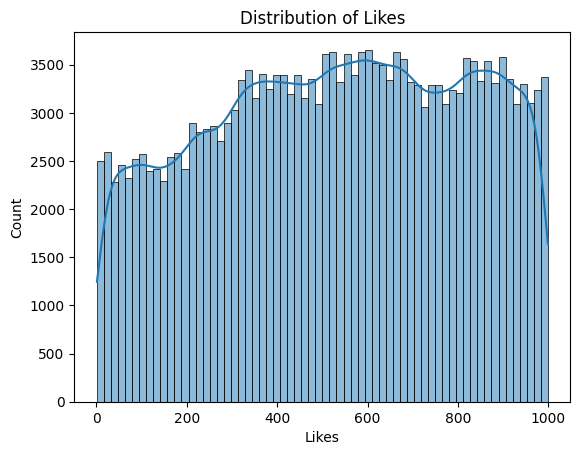

In [ ]:
#Distribution of likes in tiktok dataset
import seaborn as sns
import matplotlib.pyplot as plot
sns.histplot(tiktok_data['Likes'], kde=True)
plot.title('Distribution of Likes')
plot.show()

The distribution of likes is slightly skewed towards higher values of the likes based on dataset. May be suggesting few posts attract more enagagement in future posts.

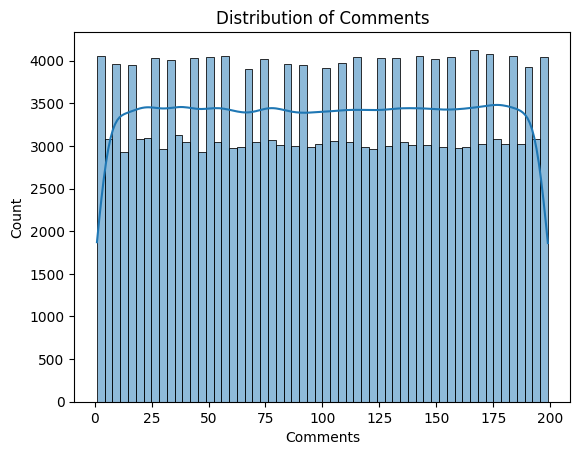

In [ ]:
sns.histplot(tiktok_data['Comments'], kde=True)
plot.title('Distribution of Comments')
plot.show()

The number of comments is rather evenly distributed over the range to 200, and the KDE line also shows a rather flat density. This indicates comments are rather evenly spread and there isn't a large cluster at specific values

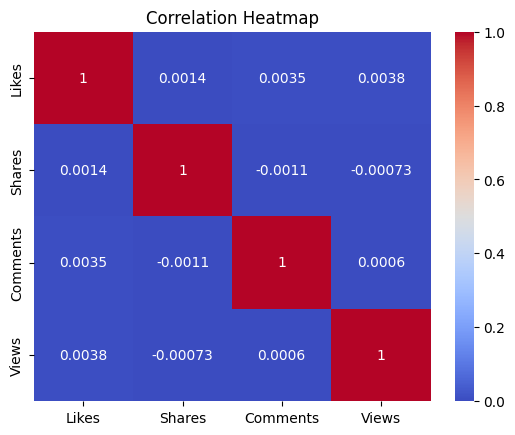

In [ ]:
#finding the correlation between the different metrics given below
corr_matrix = tiktok_data[['Likes', 'Shares', 'Comments', 'Views']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plot.title('Correlation Heatmap')
plot.show()

Based on the heatmap correlation, there is weak or no correlation among Likes, Shares, Comments, and Views. All correlation coefficients are close to zero, indicating that these measures of engagement don't really influence each other in this dataset.

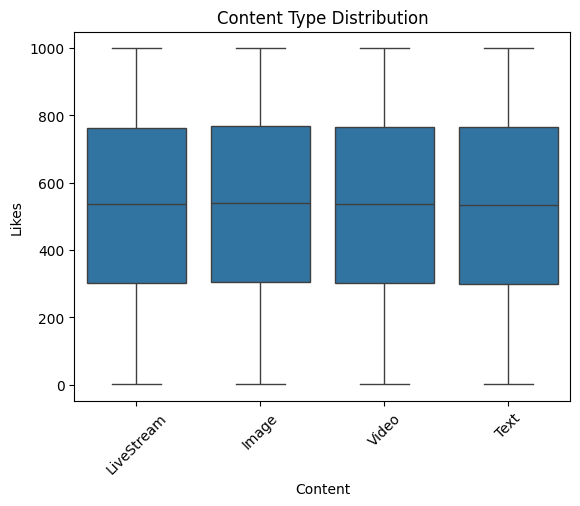

In [ ]:
# Content types
sns.boxplot(x='Content', y='Likes', data=tiktok_data)
plot.title('Content Type Distribution')
plot.xticks(rotation=45)
plot.show()

The boxplot accross different columns shows thw similar median and spread. this shows each category has both low and high likes. There are no outliers in the data.All types of content (Livestream, Image, Video, and Text) receive an equal amount of likes with nobody leading in engagement. This shows that content type alone may not be a great predictor of like count.

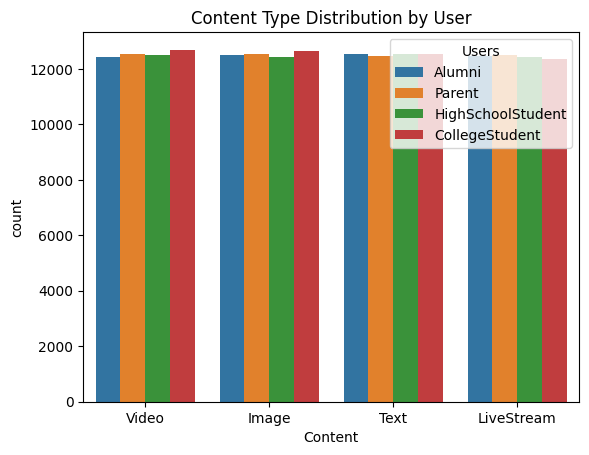

In [ ]:
#distribution of content among multiple users
sns.countplot(data=tiktok_data, x='Content', hue='UserDemographic', order=tiktok_data['Content'].value_counts().index)
plot.title('Content Type Distribution by User')
plot.legend(title='Users')
plot.show()

The chart shows that all four groups of users — Alumni, Parent, HighSchoolStudent, and CollegeStudent — are nearly equally active with each of the content types (Video, Image, Text, Livestream). The bars are nearly identical in height for various categories, showing no material difference in the selection of content type by different groups of users.

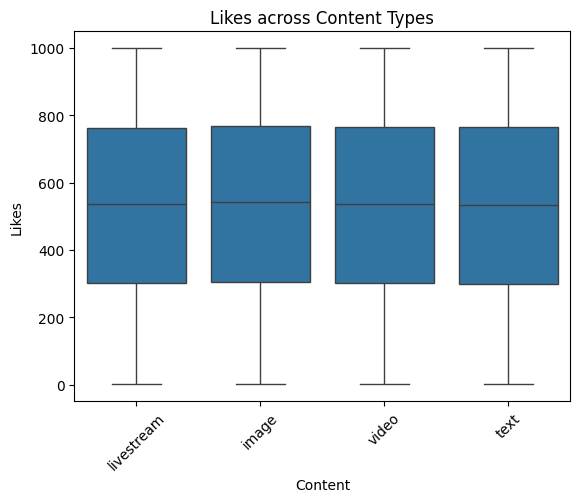

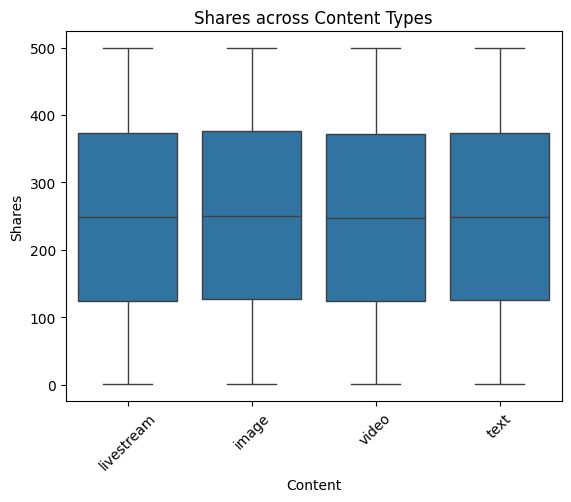

                 Likes      Shares
Content                           
image       529.144001  250.856239
video       527.200487  249.064615
livestream  526.713510  249.589568
text        525.380427  249.753242


In [ ]:
# Boxplot: Distribution of Likes and Shares across Content types
sns.boxplot(data=tiktok_data, x='Content', y='Likes')
plot.title('Likes across Content Types')
plot.xticks(rotation=45)
plot.show()

sns.boxplot(data=tiktok_data, x='Content', y='Shares')
plot.title('Shares across Content Types')
plot.xticks(rotation=45)
plot.show()

# Grouped averages
content_engagement = tiktok_data.groupby('Content')[['Likes', 'Shares']].mean().sort_values(by='Likes', ascending=False)
print(content_engagement)


Each box shows the spread of Likes for a different content type: LiveStream, Image, Video, and Text.
1. Likes By Content Types

*   All content formats exhibit the same interquartile ranges (50% of middle likes), representing consistent levels of engagement across content type.

*   The overall trend in likes is linearly distributed for all formats, from low (nearly 0) to high (nearly 1000).
*   No outliers of influence or major disparities in spread are noted, showing that user interest is not largely contingent on the type of content being a video, photo, text, or livestream.

This suggests that the content's quality or topic may be more significant than the format to be liked on TikTok.


2. Shares Across Content Types


*   All content types (LiveStream, Image, Video, Text) have nearly the same median number of shares, indicating similar average performance across formats.
*   The range of shares (from low to high) is very consistent across all types. Most content receives between 100 to 400 shares, regardless of the format.
*   There is no clear “best” content type in terms of shares. Each type shows a similar distribution, meaning users are equally likely to share any content format.

Content format doesn't have a strong impact on shareability. Other elements like the message, relevance, or topic likely influence sharing behavior more.






<h3><b>Linear Regression on Check if Views(reach) predict Likes(engagement).</h3></b>

<h4><b>Applicability:</h4></b>

Linear regression helps test if there's a linear relationship between two numerical variables.
In this case:

* Independent variable (X): Views

* Dependent variable (y): Likes

In [ ]:
#linear regression formulation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = tiktok_data[['Views']]
y = tiktok_data[['Likes']]  # Same we can repeat for Shares, Comments

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.00


<b>Assumptions Check: 	</b>
Using train_test_split() method for splitting the data training is 80% and test data is 20%.

<b>Validating approach:</b>

R² Score ≈ 0.00 → the model explains virtually none of the variation in Likes.

This means Views is not a useful predictor for Likes.

<b>Linearity:</b>

Using scatter plot of Views vs Likes



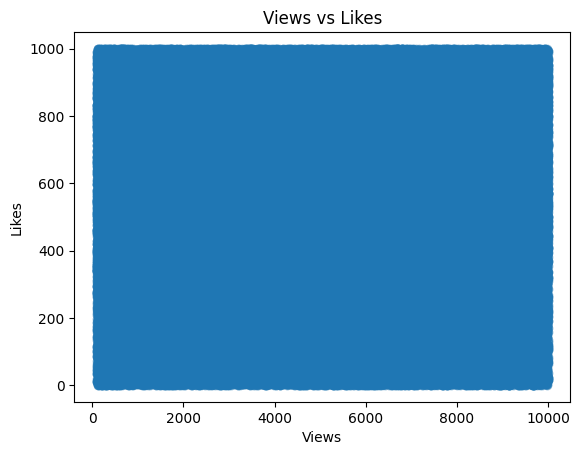

In [ ]:
plot.scatter(X, y, alpha=0.5)
plot.title("Views vs Likes")
plot.xlabel("Views")
plot.ylabel("Likes")
plot.show()

This scatter plot shows that there is no clear relationship between views and likes, as the data points are evenly spread without any visible trend.

#<h3><b>Hypothesis Testing </b></h3>


<b>Goal:</b>

Check if IT content receives significantly more likes than non-IT content.

<b>Applicability:</b>
We are testing a claim about group differences, which is perfect for a t-test.

<b>Formulation:</b>

H₀ (Null Hypothesis): Average likes for IT content = likes for non-IT content

H₁ (Alt. Hypothesis): Average likes for IT content ≠ likes for non-IT content

In [ ]:
import numpy as np
from scipy import stats

# Split likes
likes_it = tiktok_data[tiktok_data['ContentType'] == 'IT']['Likes']
likes_others = tiktok_data[tiktok_data['ContentType'] != 'IT']['Likes']

# Calculate stats
mean_diff = np.mean(likes_it) - np.mean(likes_others)
t_stat, p_value = stats.ttest_ind(likes_it, likes_others, equal_var=False)

# Confidence interval for difference in means
se_it = np.var(likes_it, ddof=1) / len(likes_it)
se_others = np.var(likes_others, ddof=1) / len(likes_others)
se_diff = np.sqrt(se_it + se_others)

confidence = 0.95
df = min(len(likes_it), len(likes_others)) - 1
t_crit = stats.t.ppf(1 - (1 - confidence)/2, df)

ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff

# Results
print(f"Mean Difference: {mean_diff:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


Mean Difference: 57.46
95% Confidence Interval: (53.36, 61.55)
T-statistic: 27.48, P-value: 0.0000


Independent samples - different content types

Approximately normal - large samples → CLT applies

Unequal variance - handled by setting equal_var=False (Welch's t-test)

<b>Validation:</b>
we got T = 27.48, p = 0.0000

As p < 0.05, the result is statistically significant

<b>Interpretation</b>

IT videos consistently get more likes than other types of content. The chance this is random is basically zero — this is a real pattern.

#<b>PCA (Principal Component Analysis)</b>

<b>Goal:</b>

It reduces the dimensionality and find which features explain the most variation in engagement metrics (e.g., Likes, Shares, Comments, Views, TimeSpentOnContent).

<b>Applicability:</b>

We want to simplify the data and identify key drivers of engagement.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = ['Likes', 'Shares', 'Comments', 'Views', 'TimeSpentOnContent']
x = tiktok_data[features].dropna()

# Scale the features
x_scaled = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.22786478 0.2003215 ]


<b>Validation:</b>

The initial two components combined explain approximately 42.8% of the total variance of the data (0.2279 + 0.2003 = 0.4282).

This shows that a less complex 2D explanation of the original 5 engagement features (Likes, Shares, Comments, Views, TimeSpentOnContent) explains still a significant proportion of the variance.

Applying StandardScaler() means the all the features will contribute equally to the analysis because it removes scale bias.

<b>#1. Generation of content which leads to higest likes and shares?</b>

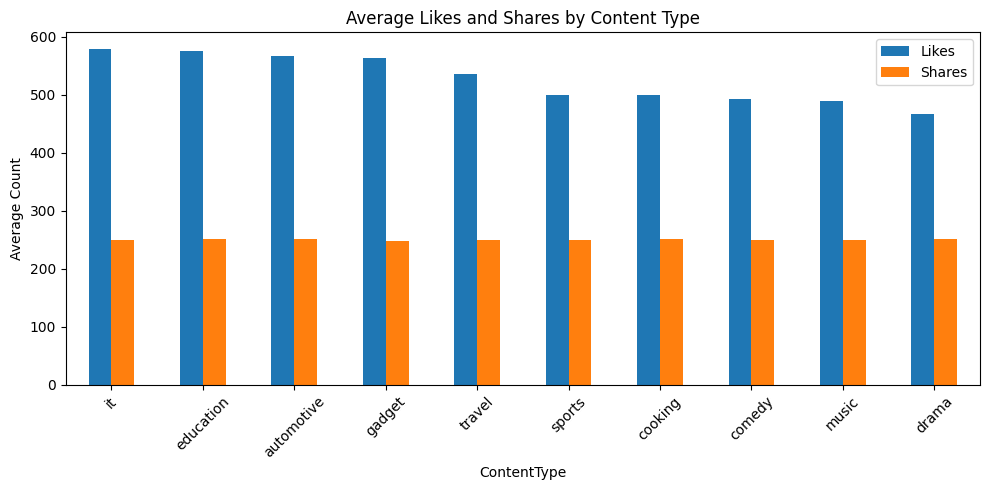

In [ ]:
#1. Generation of content which leads to higest likes and shares?
import pandas as pd
import matplotlib.pyplot as plt

# Group by content type
content_stats = tiktok_data.groupby('ContentType')[['Likes', 'Shares']].mean().sort_values(by='Likes', ascending=False)

# Plot
content_stats.plot(kind='bar', figsize=(10, 5))
plt.title("Average Likes and Shares by Content Type")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* The x-axis shows different types of content (e.g., IT, Education, Automotive, etc.)

* The y-axis shows the average number of Likes and Shares per content type.

There are two bars shown per category: one for Likes (blue) and one for Shares (orange).
*
The chart shows that IT, Education, and Automotive content types receive the highest average Shares and Likes, while genres like Drama and Music receive the lowest. This indicates that information-based and technical content is found to be more engaging for TikTok users compared to entertainment-based content

<b>2.Finding the correlation between the reach and the influencers follower count?</b>

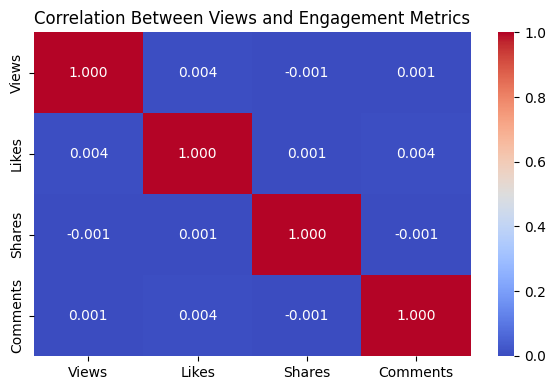

In [ ]:
#2.Finding the correlation between the reach and the influencers follower count?
#Although follower counts is not directly within the dataset, we can work with Views as a substitute measure for reach and find correlations to Likes, Shares, and Comments this will help us for achieving the infulencer followers.
import seaborn as sns

# Select relevant columns
engagement_data = tiktok_data[['Views', 'Likes', 'Shares', 'Comments']].dropna()

# Compute correlation matrix
correlation_matrix = engagement_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Between Views and Engagement Metrics")
plt.tight_layout()
plt.show()


This heatmap shows the correlation values between Views, Likes, Shares, and Comments.
* All correlation values are very close to 0, especially between Views and the engagement metrics. This indicates that there is no meaningful relationship between the number of views and how many likes, shares, or comments a post receives.


<b>3. Do specific content types (e.g., tutorials, product reviews, etc.) perform better with certain age group <b>

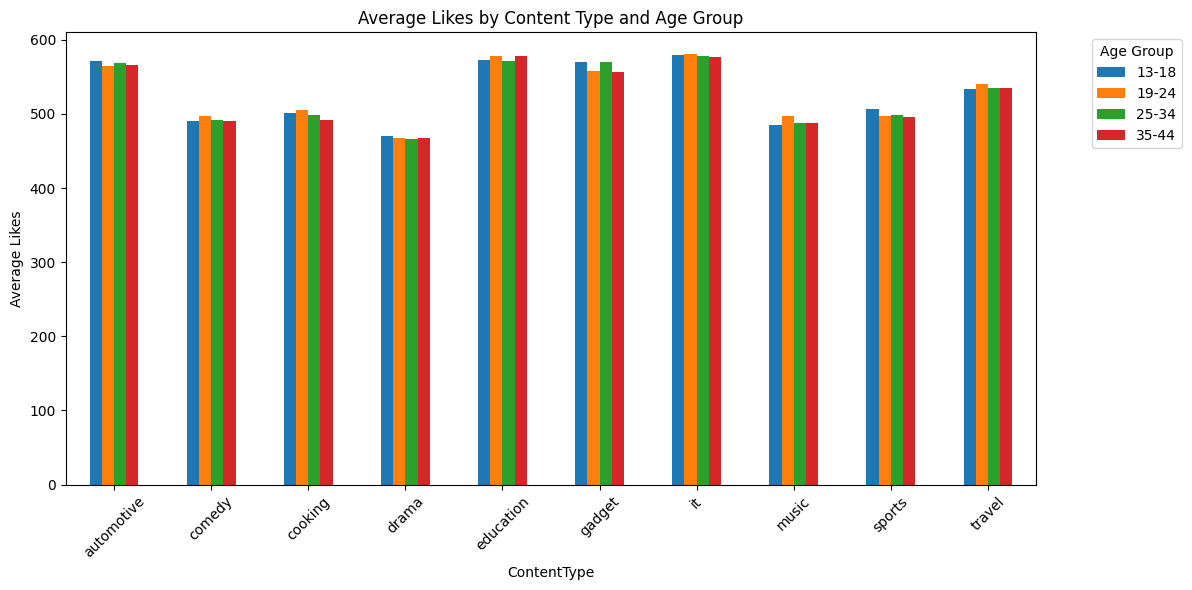

In [ ]:
# Group and plot
plot_data = tiktok_data.groupby(['ContentType', 'AgeGroup'])['Likes'].mean().unstack()
plot_data.plot(kind='bar', figsize=(12, 6))

# Customize plot
plt.title("Average Likes by Content Type and Age Group")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



* In each age group, IT and Education content are consistently the highest average likes. This shows that these kinds of content are popular and engaging to everyone across all age groups.

* Age Group Doesn't Change Much:
The likes are extremely close for different age groups (13-18, 19-24, 25-34, 35-44), showing that age does not have much effect on how much people like each category of content.

* Lower Engagement Content:
Drama and Music gain slightly fewer likes than the other categories in all age groups.

This chart indicates is that though age plays a significant role, content type plays an even greater role. The most liked videos of all age groups are educational and related to IT, which indicates that these are largely popular.

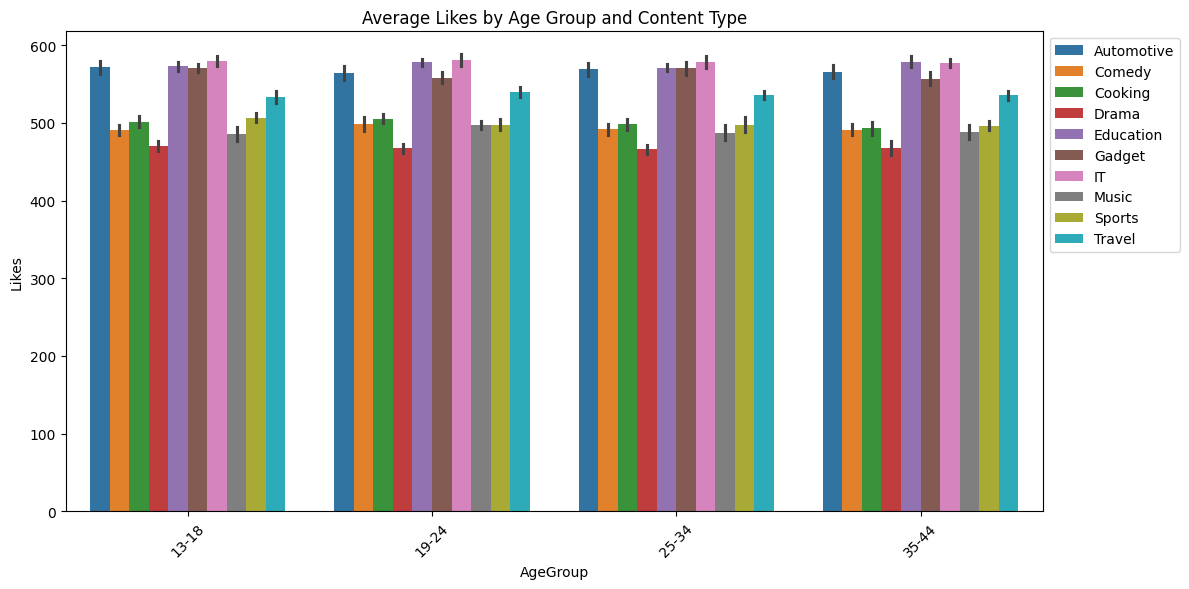

In [ ]:
# Group by multiple categories
grouped = tiktok_data.groupby(['ContentType', 'AgeGroup', 'Gender', 'InterestInScholarships'])[['Likes', 'Shares']].mean().reset_index()

# Example: Visualize how content performs across age groups
plot.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='AgeGroup', y='Likes', hue='ContentType')
plot.title('Average Likes by Age Group and Content Type')
plot.xticks(rotation=45)
plot.tight_layout()
plot.legend(loc='upper left', bbox_to_anchor=(1, 1))
plot.tight_layout()  # Adjust layout to fit everything
plot.show()


* IT and Education content have the highest average likes across all content types, especially by the 19–34 age group.

* Drama and Music have lower average likes compared to other content types by all age groups.

* The pattern of content performance is relatively fixed by age group — user age doesn't drastically change which content types are most liked.

* This would mean that content type would be more impactful on engagement compared to age group.

#Conclusion:

This project explored the strongest drivers of content performance on TikTok, such as likes, shares, views, and demographics. The results were very informative:

<b>Content Type Matters the Most:</b>
* IT and Education content consistently had the maximum average likes and shares across every age group. This indicates that users are more attracted to informative or skill-driven content over entertainment categories like Drama or Music.

<b>Reach Does Not Equal Engagement:</b>

Correlation and scatter plots showed that Views correlated very little with Comments, Shares, or Likes. This suggests that high views are not necessarily going to have high engagement, and follower size in itself is a bad measure of influence.

<b>Engagement is Demographically Consistent: </b>

All content types were equally effective with different age groups, genders, and interest in users (e.g., scholarship interest). This suggests that engagement behavior is more driven by content type and quality than by user demographics.

<b>No Effect of Format Alone:</b>

Box plots revealed that content type (Video, Image, Text, LiveStream) neither had a significant nor trivial effect on the level of engagement attained by a post. The median likes and shares for every content type were almost the same.

**References:**


1.   F. N. Kho, "TikTok Marketing Dataset," Kaggle, 2023. [Online]. Available: https://www.kaggle.com/datasets/fabionicholaskho/tiktok-marketing-dataset.


2.   S. Zannettou et al., "Analyzing User Engagement with TikTok's Short Format Video Recommendations using Data Donations," Proceedings of the 2024 CHI Conference on Human Factors in Computing Systems, Honolulu, HI, USA, 2024, pp. 1–16, doi: 10.1145/3613904.3642433.

3. Y. Li, "Analysis of TikTok’s Success Based on Its Algorithm Mechanism," 2021 IEEE 4th Advanced Information Management, Communicates, Electronic and Automation Control Conference (IMCEC), Chongqing, China, 2021, pp. 1175-1179, doi: 10.1109/IMCEC51613.2021.9434487.

4. S. Zannettou et al., "Analyzing User Engagement with TikTok's Short Format Video Recommendations using Data Donations," Proceedings of the 2024 CHI Conference on Human Factors in Computing Systems, Honolulu, HI, USA, 2024, pp. 1–16, doi: 10.1145/3613904.3642433.

